# LSTM Model

In [3]:
from datetime import datetime
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
df = pd.read_csv('BTC_Dataset.csv')
df['ClosingPrice'] = df['Price']/100000
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %', 'Price'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.sort_values('Date')
df.index = np.arange(0, len(df))
df

,Date,ClosingPrice
0,2017-12-01,0.108615
1,2017-12-02,0.109127
2,2017-12-03,0.112462
3,2017-12-04,0.116239
4,2017-12-05,0.116671
...,...,...
1943,2023-03-28,0.272622
1944,2023-03-29,0.283504
1945,2023-03-30,0.280295
1946,2023-03-31,0.284737


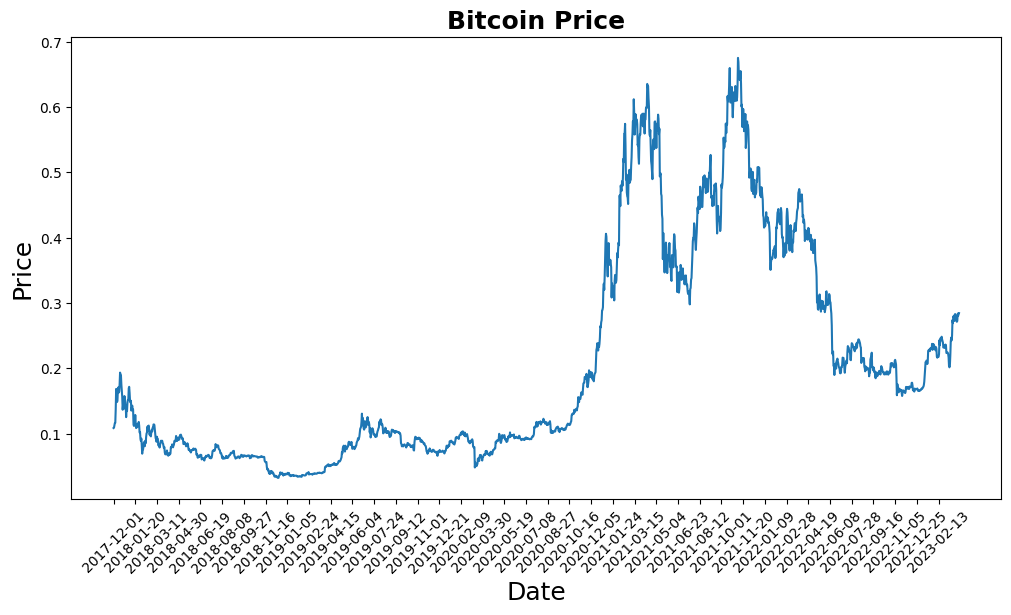

In [22]:
# Illustrated diagram
price = df[['ClosingPrice']]
plt.figure(figsize = (12,6))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [6]:
# Preprocessing and dividing the dataset into train/test
price = np.array(price)
price

array([[0.108615],
       [0.109127],
       [0.112462],
       ...,
       [0.280295],
       [0.284737],
       [0.284561]])

In [7]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [8]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

1558 390


In [9]:
# Convert the array of values to the matrix of dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1554, 3)
(1554,)
(386, 3)
(386,)


In [11]:
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
trainX.shape
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(386, 3, 1)

In [12]:
# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(trainX, trainY, epochs=300, verbose=1)

Epoch 1/300
49/49 [==============================] - 4s 6ms/step - loss: 0.0368
Epoch 2/300
49/49 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 3/300
49/49 [==============================] - 0s 6ms/step - loss: 4.2692e-04
Epoch 4/300
49/49 [==============================] - 0s 7ms/step - loss: 3.1586e-04
Epoch 5/300
49/49 [==============================] - 0s 9ms/step - loss: 2.5770e-04
Epoch 6/300
49/49 [==============================] - 0s 10ms/step - loss: 2.2423e-04
Epoch 7/300
49/49 [==============================] - 1s 11ms/step - loss: 2.1660e-04
Epoch 8/300
49/49 [==============================] - 1s 10ms/step - loss: 2.1082e-04
Epoch 9/300
49/49 [==============================] - 0s 10ms/step - loss: 2.1157e-04
Epoch 10/300
49/49 [==============================] - 1s 11ms/step - loss: 2.1657e-04
Epoch 11/300
49/49 [==============================] - 0s 7ms/step - loss: 2.1176e-04
Epoch 12/300
49/49 [==============================] - 0s 7ms/step - loss: 2.2

In [14]:
LSTM_predict= model.predict(testX)
LSTM_predict.reshape(-1,1)

13/13 [==============================] - 0s 3ms/step


array([[0.40034017],
       [0.39068002],
       [0.39185673],
       [0.38315034],
       [0.3983785 ],
       [0.3971391 ],
       [0.41240597],
       [0.41253805],
       [0.41949582],
       [0.42452097],
       [0.41626024],
       [0.41298658],
       [0.42495352],
       [0.43117106],
       [0.44132137],
       [0.44513145],
       [0.44709775],
       [0.46860838],
       [0.47301364],
       [0.47567132],
       [0.47235072],
       [0.45737916],
       [0.46335688],
       [0.46006712],
       [0.46491903],
       [0.46770483],
       [0.45721185],
       [0.43472782],
       [0.4355392 ],
       [0.4259229 ],
       [0.42916343],
       [0.42430598],
       [0.39944187],
       [0.4030081 ],
       [0.41337174],
       [0.40381622],
       [0.4078751 ],
       [0.40718073],
       [0.40095317],
       [0.4099268 ],
       [0.4173297 ],
       [0.4166005 ],
       [0.40849888],
       [0.40092304],
       [0.39783674],
       [0.3980981 ],
       [0.40657204],
       [0.387

In [13]:
testY = testY.reshape(-1,1)
testY.shape

(386, 1)

In [23]:
date = pd.to_datetime(df.Date)
date = date[(len(date)-len(testY)):]
date

1562   2022-03-12
1563   2022-03-13
1564   2022-03-14
1565   2022-03-15
1566   2022-03-16
          ...    
1943   2023-03-28
1944   2023-03-29
1945   2023-03-30
1946   2023-03-31
1947   2023-04-01
Name: Date, Length: 386, dtype: datetime64[ns]

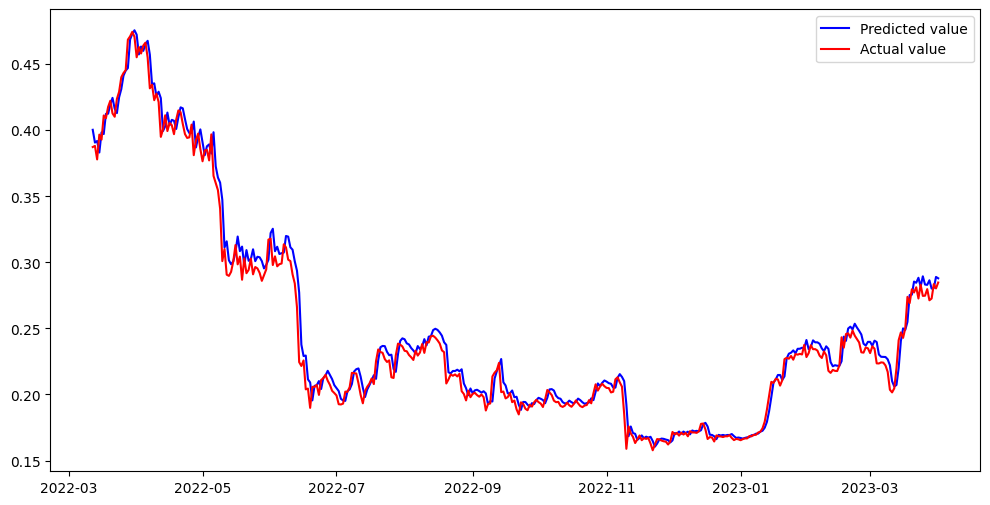

In [18]:
fig= plt.figure(figsize=(12,6))
plt.plot(date,LSTM_predict,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
#MAPE
mean_absolute_percentage_error(testY, LSTM_predict)

2.7266345737436333

In [21]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, LSTM_predict)
RMSE = math.sqrt(MSE)
print(RMSE)

0.009636691534795449
